In [281]:
# Data processing  
# -----------------------------------------------------------------------  
import numpy as np
import pandas as pd  

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None

# Other objectives  
# -----------------------------------------------------------------------  
import math  

# Graphics  
# -----------------------------------------------------------------------  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 


# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import plot_categoric_distribution, plot_correlation_matrix, plot_numeric_distribution, plot_relation_tv_numeric, plot_outliers  

In [76]:
df = pd.read_csv('../data/raw/api_rent_madrid.csv', delimiter=';')

In [77]:
df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,...,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,...,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,...,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [78]:
df.duplicated().sum()

8

In [79]:
df.drop_duplicates(inplace=True)

### Main Columns

- **`propertyCode`**: Unique code identifying each property.

- **`price`**: Property price in euros (target variable).

- **`propertyType`**: Type of property (e.g., apartment, penthouse, chalet, etc.).

- **`size`**: Size of the property in square meters.

- **`rooms`**: Number of rooms.

- **`bathrooms`**: Number of bathrooms.

- **`district`**: District where the property is located (e.g., Centro, Hortaleza).

- **`neighborhood`**: Neighborhood within the district (less complete data compared to `district`).

- **`latitude`** and **`longitude`**: Geographic coordinates of the property.

- **`address`**: Approximate or descriptive address of the property.

- **`operation`**: Type of operation, such as sale or rent.

- **`province`**: Province where the property is located.

- **`municipality`**: Municipality where the property is situated.

- **`country`**: Country of the property.

### Additional Attributes

- **`numPhotos`**: Number of photos available for the property.

- **`exterior`**: Boolean indicator showing if the property is exterior-facing (`True` or `False`).

- **`hasLift`**: Indicates if the property has an elevator (`True` or `False`, with some null values).

- **`parkingSpace`**: Information about parking space (detailed in JSON format in some rows).

- **`priceByArea`**: Price per square meter in euros.

- **`floor`**: Floor where the property is located (e.g., ground floor, 1st floor, penthouse).

- **`description`**: Textual description of the property.

- **`distance`**: Distance in meters from a reference point (e.g., the center).

### Listing Features Columns

- **`hasVideo`**: Indicates if the listing includes a video (`True` or `False`).

- **`has3DTour`**: Indicates if the listing has a 3D tour available.

- **`newDevelopment`**: Boolean indicating if the property is a new development.

- **`superTopHighlight`** and **`topNewDevelopment`**: Boolean indicators of the prominence or highlight status of the listing on the platform.

### Less Complete Features

- **`neighborhood`** and **`district`**: Although important, these contain null values and may require cleaning.

- **`parkingSpace`** and **`labels`**: Information limited to a few properties.

- **`newDevelopmentFinished`**: Only available for specific properties, with low representation.

- **`showAddress`**: Indicates whether the address is visible in the listing.

- **`detailedType`**: Detailed type of the property.

- **`suggestedTexts`**: Texts suggested by the platform to enhance the listing’s presentation.

- **`has360`**: Whether the listing includes 360-degree images.

- **`hasStaging`**: Indicates if virtual staging is present in the listing.

- **`externalReference`**: External reference provided by the advertiser.



In [210]:
def value_counts(df, col):

    return pd.concat([df[col].value_counts(), df[col].value_counts(normalize=True).round(2)], axis=1)

In [69]:
def quick_plot_numeric(df, col, num=10, size=(10,5), rotation=45):

    max_ = df[col].max()
    min_ = df[col].min()
    n = (max_ - min_) // num

    if n < 2:
        return
    
    plot_numeric_distribution(df, min_, max_, col, n, size=size, rotation=rotation)

In [80]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
propertyCode,442.0,94573262.11,13974749.91,666696.0,97550391.50,98662647.0,98894324.25,98939685.0
numPhotos,442.0,21.85,9.66,0.0,15.00,21.0,28.00,72.0
price,442.0,672.96,83.96,340.0,645.00,700.0,740.00,750.0
size,442.0,67.96,35.87,20.0,46.25,62.0,80.00,371.0
rooms,442.0,1.70,0.98,0.0,1.00,2.0,2.00,6.0
bathrooms,442.0,1.21,0.44,1.0,1.00,1.0,1.00,3.0
distance,442.0,22266.39,16991.27,183.0,7089.00,20001.0,34854.75,59919.0
priceByArea,424.0,11.95,5.37,1.0,8.00,11.0,15.00,33.0


In [81]:
df['price'].isna().value_counts()

price
False    442
Name: count, dtype: int64

No hay nigún valor nulo en la variable objetivo, por lo que todo guay

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            442 non-null    int64  
 1   numPhotos               442 non-null    int64  
 2   price                   442 non-null    float64
 3   propertyType            442 non-null    object 
 4   operation               442 non-null    object 
 5   size                    442 non-null    float64
 6   exterior                442 non-null    bool   
 7   rooms                   442 non-null    int64  
 8   bathrooms               442 non-null    int64  
 9   address                 442 non-null    object 
 10  province                442 non-null    object 
 11  municipality            442 non-null    object 
 12  country                 442 non-null    object 
 13  latitude                442 non-null    object 
 14  longitude               442 non-null    object 

## Main columns

### **`propertyCode`**

Unique code identifying each property.

In [89]:
print(f"There are a total of {df['propertyCode'].unique().shape[0]} different property codes out of {df.shape[0]} entries")

There are a total of 442 different property codes out of 442 entries


In [206]:
print(f"Number of missing values: {df['propertyCode'].isna().sum()}\nNumber of different entries: {df['propertyCode'].nunique()}")

Number of missing values: 0
Number of different entries: 442


`propertyCode` es un buen identificador para cada vivienda ya que no tiene repetidos. El eliminado de duplicados ha funcionado adecuadamente.

In [87]:
df['propertyCode'].unique().shape[0]

442

### **`price`**

Property price in euros (target variable).

In [101]:
df['price'].describe().round(2)

count    442.00
mean     672.96
std       83.96
min      340.00
25%      645.00
50%      700.00
75%      740.00
max      750.00
Name: price, dtype: float64

El precio más alto es de 750 euros con una media de ~673 euros y mediana de 700. Es decir, la mayoría de los datos se encuentran en este rango de 700-750 euros. 

La desviación típica es de ~84 euros. Lo que indica que existe cierta dispersión en los datos, principalmente dada por los valores má bajos ya que el mínimo llega hasta 340.

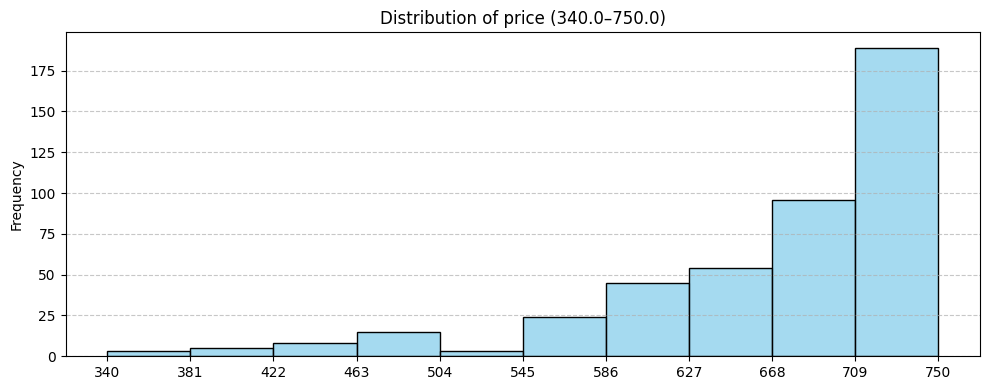

In [98]:
min_ = df['price'].min()
max_ = df['price'].max()

plot_numeric_distribution(df, min_, max_, 'price', n = 41, size=(10,4), rotation=0)

Vemos por tanto que los precios están agrupados principalmente hacia los valores más altos con una cola hacia la izquierda relativamente prolongada. Este límite superior en el precio sugiere la aplicación de algún tipo de filtro de selección previo o, menos probablemente, la aplicación de alguna política de límites abusivos contra el mercado especulativo de la vivienda.

### **`propertyType`**

Type of property (e.g., apartment, penthouse, chalet, etc.).

In [207]:
print(f"Number of missing values: {df['propertyType'].isna().sum()}\nNumber of different entries: {df['propertyType'].nunique()}")

Number of missing values: 0
Number of different entries: 6


In [211]:
value_counts(df, 'propertyType')

,count,proportion
propertyType,,
flat,348,0.79
studio,48,0.11
duplex,19,0.04
penthouse,16,0.04
chalet,9,0.02
countryHouse,2,0.00


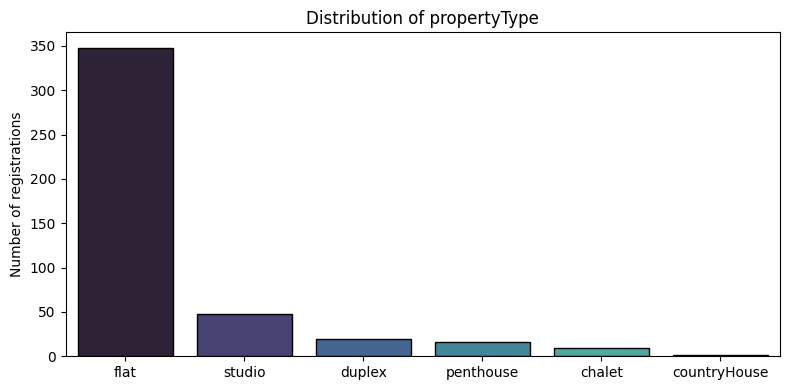

In [107]:
plot_categoric_distribution(df, 'propertyType', rotation=0)

La mayoría de propiedades son `flat`, lo cual tiene sentido al tratarse de una gran ciudad como Madrid. La siguiente categoría son `studio` que se tratan de propiedades que no tienen habitaciones y constan de una estancia única.

El resto de tipos de propiedades son muy poco frecuentes pero pueden ser representativas para el análisis.

¿Son los `studio` equivalentes a cero habitaciones?

Aparentemente sí, pero vamos a verlo.

In [128]:
df[(df['propertyType'] != 'studio') & (df['rooms'] == 0)]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
241,88875520,15,750.0,penthouse,rent,80.0,True,0,1,Zona Industrial,...,False,False,3248-16907,1,Zona Industrial,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [129]:
df[(df['propertyType'] == 'studio') & (df['rooms'] != 0)]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished


No hay ningún `studio` que no tenga 0 habitaciones, lo que es coherente con la definición de `studio`. Sin embargo, sí hay una vivienda que tiene 0 habitaciones y no es `studio` sino `penthouse`. Esto sí es posible ya que un `penthouse` puede tener 0 habitaciones pero al establecer la categoría no se han podido seleccionar ambas de forma simultánea.

### **`size`**

Size of the property in square meters.

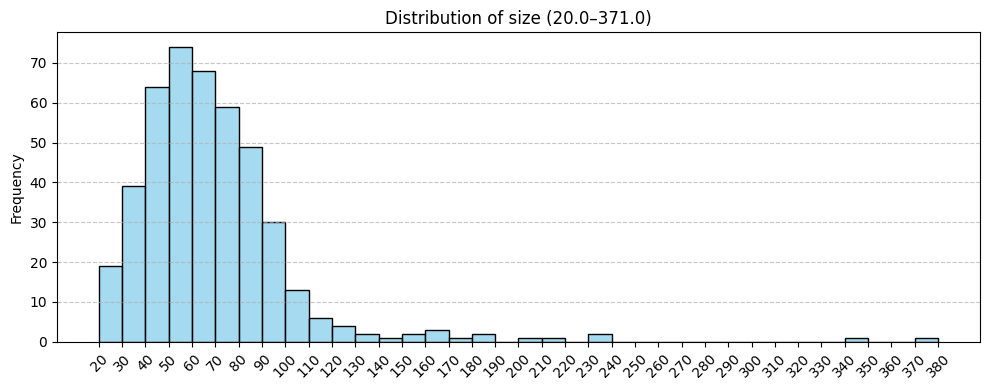

In [143]:
min_ = df['size'].min()
max_ = df['size'].max()

plot_numeric_distribution(df, min_, max_, 'size', n = 10, size=(10,4))

La mayoría de viviendas tienen un tamaño relativamente pequeño, entre 20 y 100 con una distribución aparentemente normal pero con una larga cola a la derecha que posiblemente representen casas más espaciosas a las afueras de la ciudad.

### **`rooms`**

Number of rooms.

In [208]:
print(f"Number of missing values: {df['rooms'].isna().sum()}\nNumber of different entries: {df['rooms'].nunique()}")

Number of missing values: 0
Number of different entries: 6


In [212]:
value_counts(df, 'rooms')

,count,proportion
rooms,,
2,171,0.39
1,135,0.31
3,77,0.17
0,49,0.11
4,9,0.02
6,1,0.00


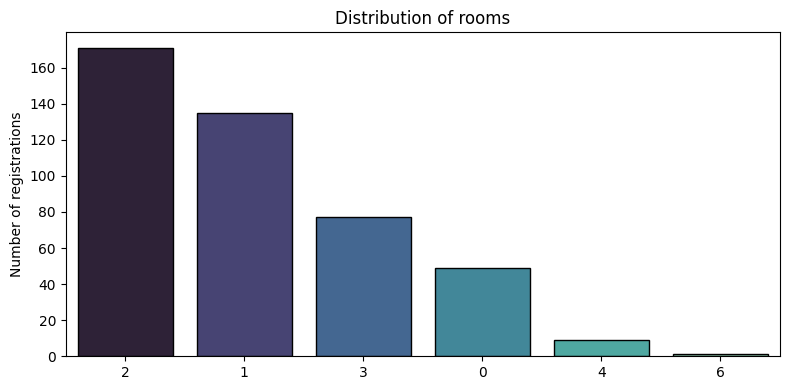

In [146]:
plot_categoric_distribution(df, 'rooms', size = (8, 4), rotation=0)

La gran mayoría de viviendas tienen entre 1 y 3 habitaciones, que es lo más habitual para viviendas para familias pequeñas, parejas o para una sola persona. Existen también algunas que no tienen habitaciones, como hemos comentado anteriormente.

### **`bathrooms`**

Number of bathrooms.

In [213]:
print(f"Number of missing values: {df['bathrooms'].isna().sum()}\nNumber of different entries: {df['bathrooms'].nunique()}")

Number of missing values: 0
Number of different entries: 3


In [174]:
value_counts(df, 'bathrooms')

,count,proportion
bathrooms,,
1,357,0.81
2,79,0.18
3,6,0.01


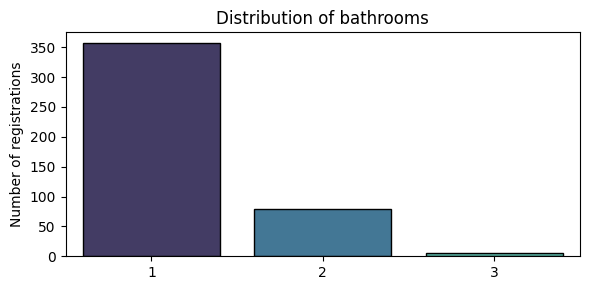

In [152]:
plot_categoric_distribution(df, 'bathrooms', size = (6, 3), rotation=0)

Más del 80% de viviendas tiene un único baño, lo que refuerza la posibilidad de una segmentación de los datos en torno a parejas, familias con pocos miembros o unidades unipersonales.

### **`district`**

District where the property is located (e.g., Centro, Hortaleza).

In [214]:
print(f"Number of missing values: {df['district'].isna().sum()}\nNumber of different entries: {df['district'].nunique()}")

Number of missing values: 109
Number of different entries: 96


Since we have some missing values we can create an `unkonwn` category. For next steps we can geolocate the via coordinates

In [215]:
df['district'].fillna('unkonwn', inplace=True)

In [216]:
value_counts(df, 'district').head()

,count,proportion
district,,
unkonwn,109,0.25
Centro,48,0.11
Villaverde,23,0.05
Puente de Vallecas,17,0.04
El Quiñón,13,0.03


In [217]:
print(f"Number of missing values: {df['district'].isna().sum()}\nNumber of different entries: {df['district'].nunique()}")

Number of missing values: 0
Number of different entries: 97


Let's visualize only the top 25 districts

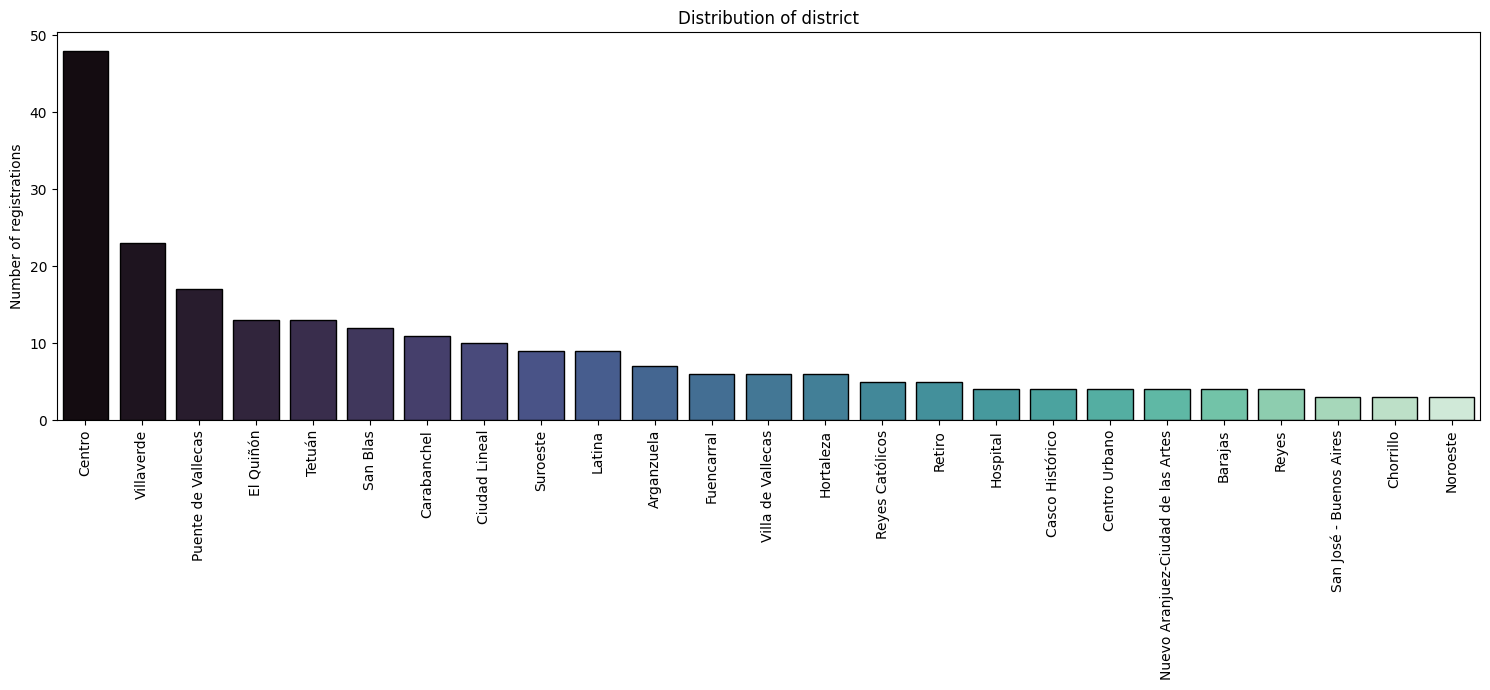

In [ ]:
main_districts = df['district'].value_counts().iloc[1:26].index.to_list()
plot_categoric_distribution(df[df['district'].isin(main_districts)], 'district', size=(15, 7), rotation=90)

Setting aside `unknown`, `centro` is the most frequent district, followed by `villaverde` and `puente de vallecas`

### **`neighborhood`**

Neighborhood within the district (less complete data compared to `district`).

In [219]:
print(f"Number of missing values: {df['neighborhood'].isna().sum()}\nNumber of different entries: {df['neighborhood'].nunique()}")

Number of missing values: 268
Number of different entries: 74


In [221]:
df['neighborhood'].fillna('unkonwn', inplace=True)

In [226]:
value_counts(df, 'neighborhood').head()

,count,proportion
neighborhood,,
unkonwn,268,0.61
Lavapiés-Embajadores,11,0.02
Villaverde Alto,9,0.02
San Diego,8,0.02
Valdeacederas,8,0.02


Since we have some missing values we can create an `unkonwn` category. For next steps we can geolocate the via coordinates

In [227]:
print(f"Number of missing values: {df['neighborhood'].isna().sum()}\nNumber of different entries: {df['neighborhood'].nunique()}")

Number of missing values: 0
Number of different entries: 75


Let's visualize only top 25 `neighborhood`

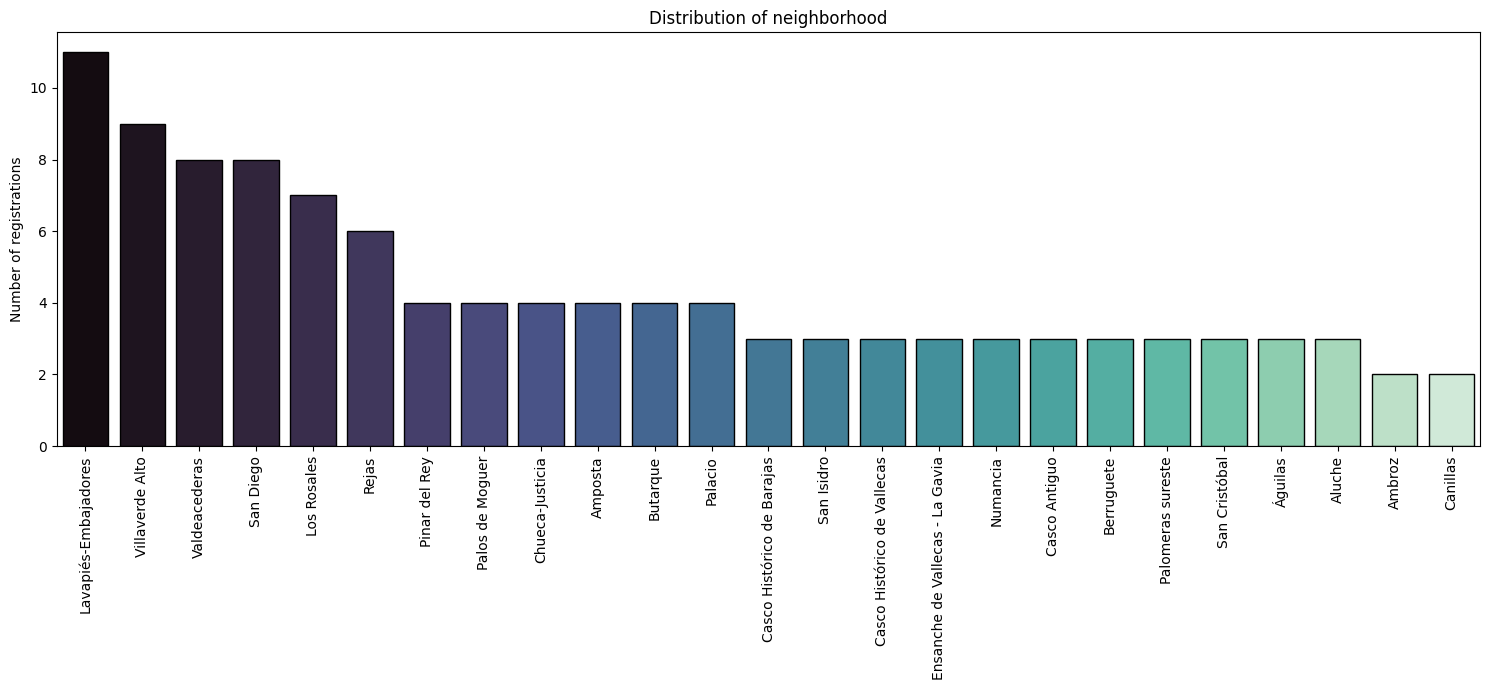

In [229]:
main_neighborhoods = df['neighborhood'].value_counts().iloc[1:26].index.to_list()
plot_categoric_distribution(df[df['neighborhood'].isin(main_neighborhoods)], 'neighborhood', size=(15, 7), rotation=90)

If we delve into the neighborhoods of each district, we find that `Lavapiés-Embajadores` has the largest number of homes, followed by neighborhoods such as `Villaverde Alto`, `Valdeacederas`, or `San Diego`.  

However, since we have quite a few unknown neighborhoods and they are a subcategory of `district`, it might be worth considering removing this column if it doesn't provide relevant information.

### **`latitude`** and **`longitude`**

Geographic coordinates of the property.

In [231]:
df[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 449
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   442 non-null    object
 1   longitude  442 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


### **`address`**

Approximate or descriptive address of the property.

In [235]:
value_counts(df, 'address').head()

,count,proportion
address,,
"Calle Valle de Ambles, 2",7,0.02
El Quiñón,4,0.01
Calle de Honduras,3,0.01
Calle de Sáhara,3,0.01
Calle de Rocafort,2,0.00


We see that there is a street with a number featuring 7 homes. We suspect they might be different rental units within the same building.

In [237]:
df[df['address'] == 'Calle Valle de Ambles, 2'].head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
245,98068981,19,692.0,flat,rent,83.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT02,NaN,Suroeste,unkonwn,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
246,98069014,19,670.0,flat,rent,79.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT07,NaN,Suroeste,unkonwn,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
248,98069020,19,718.0,flat,rent,86.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT06,NaN,Suroeste,unkonwn,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
249,98068962,19,694.0,flat,rent,81.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT04,NaN,Suroeste,unkonwn,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
250,98069018,19,658.0,flat,rent,78.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT05,NaN,Suroeste,unkonwn,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True


It seems that this is indeed the case. In any case, this column does not provide useful information for building a predictive model, so we will likely remove it.

- **`operation`**: Type of operation, such as sale or rent.

- **`province`**: Province where the property is located.

- **`municipality`**: Municipality where the property is situated.

- **`country`**: Country of the property.

---

## Additional Attributes

### **`numPhotos`**

Number of photos available for the property.

In [238]:
print(f"Number of missing values: {df['numPhotos'].isna().sum()}\nNumber of different entries: {df['numPhotos'].nunique()}")

Number of missing values: 0
Number of different entries: 49


In [243]:
df['numPhotos'].describe().T.round(2)

count    442.00
mean      21.85
std        9.66
min        0.00
25%       15.00
50%       21.00
75%       28.00
max       72.00
Name: numPhotos, dtype: float64

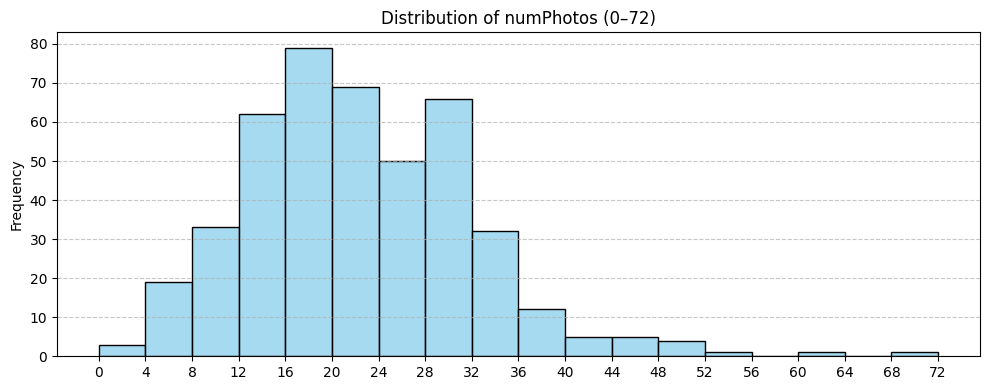

In [249]:
min_ = df['numPhotos'].min()
max_ = df['numPhotos'].max()

plot_numeric_distribution(df, min_, max_, 'numPhotos', n = 4, size=(10,4), rotation=0)

Most homes have between 4 and 40 photos, with some exceptions having a higher or lower number of images.

### **`exterior`**

Boolean indicator showing if the property is exterior-facing (`True` or `False`).

In [250]:
print(f"Number of missing values: {df['exterior'].isna().sum()}\nNumber of different entries: {df['exterior'].nunique()}")

Number of missing values: 0
Number of different entries: 2


In [252]:
value_counts(df, 'exterior')

,count,proportion
exterior,,
True,359,0.81
False,83,0.19


More than 80% of properties are exterior with the others being interior.

### **`hasLift`**

Indicates if the property has an elevator (`True` or `False`, with some null values).

In [254]:
print(f"Number of missing values: {df['hasLift'].isna().sum()}\nNumber of different entries: {df['hasLift'].nunique()}")

Number of missing values: 31
Number of different entries: 2


In [255]:
value_counts(df, 'hasLift')

,count,proportion
hasLift,,
True,226,0.55
False,185,0.45


55% of properties have lift but there are some entries with unknown values. We leave it as it is for now.

### **`parkingSpace`**

Information about parking space (detailed in JSON format in some rows).

In [256]:
value_counts(df, 'parkingSpace')

,count,proportion
parkingSpace,,
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",130,0.97
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",1,0.01
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",1,0.01
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",1,0.01
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}",1,0.01


Most listings include parking in the price, although the structure of this information is more complex, possibly the result of an API call. There don't seem to be significant differences between the listings, so for now, we will not consider this information when developing the model.

### **`priceByArea`**

Price per square meter in euros.

In [257]:
print(f"Number of missing values: {df['priceByArea'].isna().sum()}\nNumber of different entries: {df['priceByArea'].nunique()}")

Number of missing values: 18
Number of different entries: 31


We actually already have this information by dividing `price` by `size`. Let's check the differences.

In [271]:
(df['priceByArea'] - (df['price'] / df['size'])).sort_values(ascending=False, key=abs).head()

27     0.5
331    0.5
220    0.5
224    0.5
1      0.5
dtype: float64

The maximum difference is 0.5 euros per square meter, which is likely just a rounding error. Therefore, we will remove this column since it does not provide additional information and contains null values.

### **`floor`**

Floor where the property is located (e.g., ground floor, 1st floor, penthouse).

In [272]:
print(f"Number of missing values: {df['floor'].isna().sum()}\nNumber of different entries: {df['floor'].nunique()}")

Number of missing values: 81
Number of different entries: 13


In [276]:
df['floor'].fillna('unkonwn', inplace=True)

In [277]:
value_counts(df, 'floor').head()

,count,proportion
floor,,
1,94,0.21
unkonwn,81,0.18
2,75,0.17
bj,67,0.15
3,59,0.13


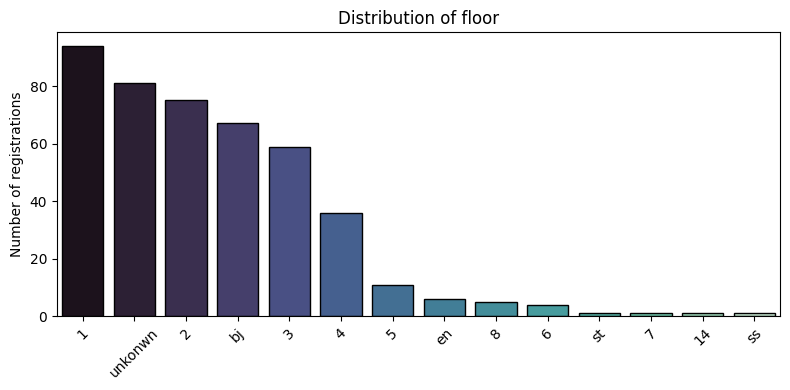

In [278]:
plot_categoric_distribution(df, 'floor')

The majority of homes are on the first floor, followed by ground floors and apartments up to the fifth floor. We also have quite a few entries with an unknown `floor`.

### **`description`**

Textual description of the property.

In [282]:
df['description'].head()

0    UGENA VILLAGE INMOBILIARIA GESTIONA en exclusiva el alquiler de CHALET INDIVIDUAL en urbanización Villeriche. La vivienda está dividida en apartamentos-casas que se pueden alquilar en conjunto o por separado. La primera vivienda cuenta con salón con estufa de pellets, cocina amueblada y equipada con campana extractora, horno, vitrocerámica, lavadora y nevera, 4 habitaciones (la principal con vestidor y baño con bañera y ducha de hidromasaje), 2 baños completos, y cuarto de plancha. Todas las estancias tienen aire acondicionado con bomba frio-calor. Vivienda recién reformada, muy luminosa y espaciosa.  La segunda vivienda cuenta con 2 habitaciones, salon con aire acondicionado, cocina amueblada y equipada con campana extractora, horno, vitrocerámica, lavadora, nevera y aire acondicionado y baño con bañera.  Alquiler vivienda 4 habitaciones: 800€ Alquiler vivienda 2 habitaciones: 550€ Alquiler vivienda entera: 1350€ *LA VIVIENDA TIENE CONTRATADO UN MANTENIMIENTO DE ZONAS COMUNES (PI

This information may be useful to complement some missing values or extract additional information. For now, we will not use it.

- **`distance`**: Distance in meters from a reference point (e.g., the center).

---

## Other columns

### Note

We will skip these columns, as they do not provide valuable information for building a model. Alternatively, they may be considered in subsequent steps for more complex models.

---

## Column selection

In [284]:
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift',
       'parkingSpace', 'labels', 'newDevelopmentFinished'],
      dtype='object')

In [297]:
value_counts(df, 'status')

,count,proportion
status,,
good,409,0.96
newdevelopment,13,0.03
renew,2,0.00


```python
['numPhotos', 'price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms', 'province', 'municipality', 'distance', 'status', 'floor', 'district', 'neighborhood', 'hasLift']

In [299]:
df_2 = df.copy()

df_2 = df_2[['numPhotos',
            'price',
            'propertyType',
            'size',
            'exterior',
            'rooms',
            'bathrooms',
            'province',
            'municipality',
            'distance',
            'status',
            'floor',
            'district',
            'hasLift']]

## Target variable vs numeric variables

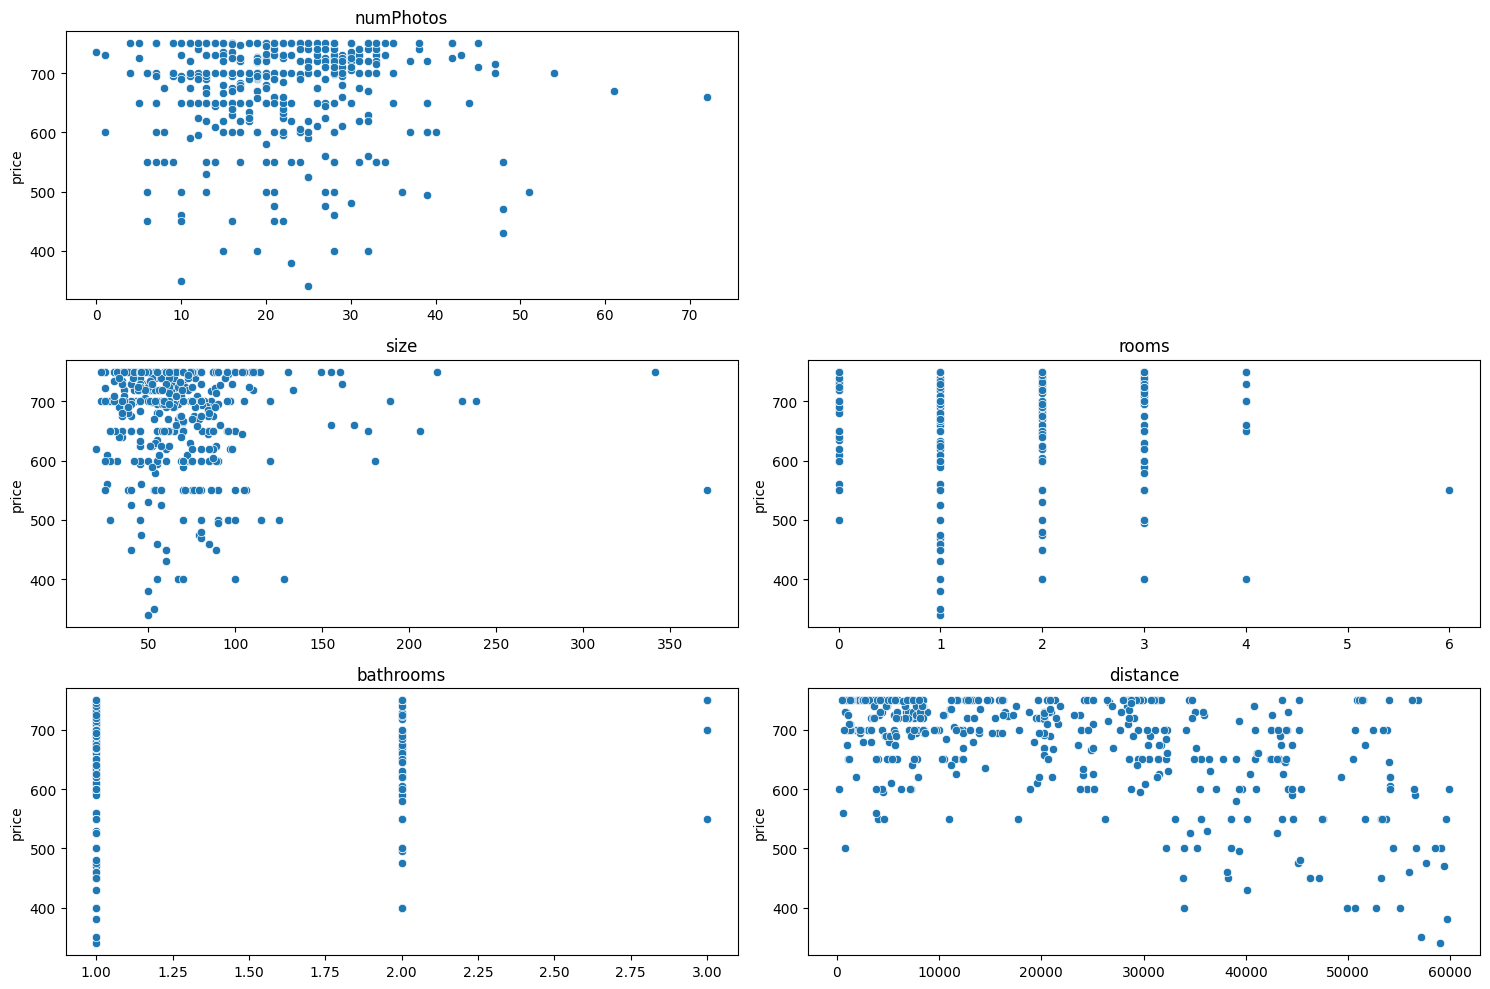

In [300]:
plot_relation_tv_numeric(df_2, 'price')

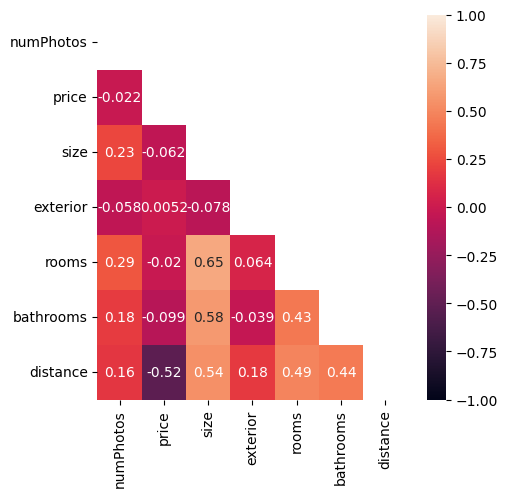

In [301]:
plot_correlation_matrix(df_2)

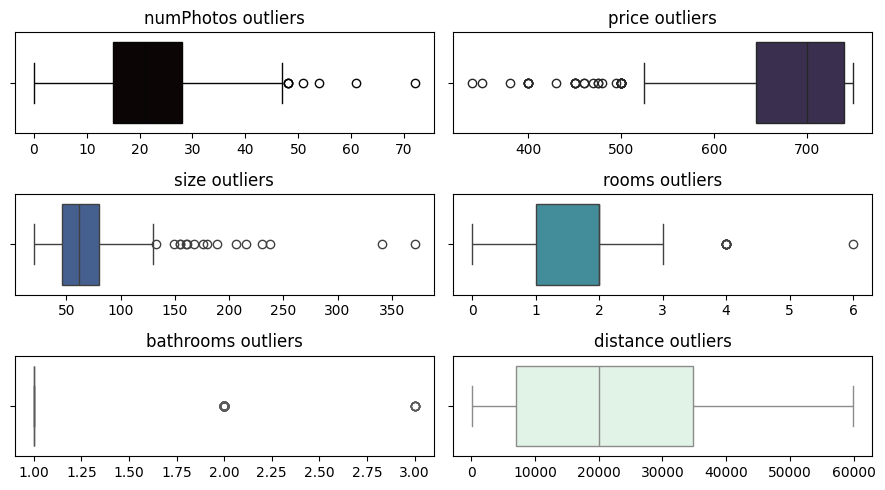

In [302]:
plot_outliers(df_2)